<h1 style="text-align: center; font-size: 2.5em; color:rgb(5, 87, 240);">Global Renewable Energy Usage</h1>
<hr style="border: 1px solid rgb(5, 87, 240);"/>

## Goal(s) ##

1. **Analyze Renewable Energy Adoption Trends**: Examine the patterns of renewable energy adoption across various countries and regions to identify key trends and insights.
   

2. **Assess Income and Household Size Impact**: Evaluate how different income levels and household sizes influence the adoption and usage of renewable energy sources.
3. **Compare Urban and Rural Energy Usage**: Investigate the differences in energy consumption patterns between urban and rural households to understand the impact of location on energy usage.
4. **Evaluate Government Subsidies**: Analyze the role of government subsidies in promoting renewable energy adoption and their effect on cost savings for households.
5. **Identify Key Drivers of Renewable Energy Usage**: Determine the primary factors that drive the adoption and usage of renewable energy sources, leveraging advanced data analytics and machine learning techniques.

## Results & Conclusion ##

1. **Dominant Sectors**: Wind and solar energy are the largest sectors in the renewable energy market, indicating a significant shift towards these sources.

2. **Geographical Usage**: Africa has the highest monthly energy usage, although the differences in consumption across different regions of the world are not substantial.

3. **Demographic Consumption**: There are no significant differences in energy consumption between rural and urban areas or across different income levels.

4. **Adoption Trends**: There has been a substantial drop-off in the adoption of new renewable energy technologies in recent years.

5. **Efficiency and Cost-Effectiveness**: Wind energy is identified as the most cost-effective energy source. Subsidies have led to an average increase of -6.18 USD in energy costs.

6. **Predictive Insights**: Predictive models indicate that cost savings and usage efficiency are the primary drivers of energy consumption.

---

## Background ##

The global transition towards renewable energy sources such as solar, wind, hydro, and geothermal is essential for addressing climate change and ensuring a sustainable energy future. This shift is driven by various factors, including technological advancements, economic incentives, and supportive policy frameworks. Understanding the patterns of renewable energy adoption and the factors influencing these patterns is crucial for effective energy management and policy-making.

Through advanced data analytics and machine learning techniques, this project seeks to provide insights that can help policymakers, utility companies, and businesses optimize resource allocation, enhance energy efficiency, and promote the adoption of renewable energy sources.

---

## Dataset(s) ##

**Renewable_Energy_Usage_Sampled.csv**

* Renewable energy adoption and usage by households around the world, spanning the years 2020 to 2024
<br>
* Provides insights into the growing trend of renewable energy sources like solar, wind, hydro, and geothermal being utilized in residential settings.
<br>

* This dataset was synthetically generated to simulate renewable energy usage by households from 2020 to 2024. Household demographics (size, income, urban/rural) were randomly assigned, and energy sources (solar, wind, hydro, geothermal) were distributed based on global adoption trends. 
  * Monthly energy usage and cost savings were calculated, and some households were assigned government subsidies based on common policies. The data was reviewed for realism and consistency.


<ins>Dictionary<ins>:

* `Household_ID`: A unique identifier for each household.

* `Region`: The geographical region where the household is located (e.g., North America, Europe, Asia).

* `Country`: The specific country of the household.

* `Energy_Source`: The type of renewable energy being used by the household (e.g., Solar, Wind, Hydro).

* `Monthly_Usage_kWh`: The monthly energy consumption in kilowatt-hours.

* `Year`: The year the data was recorded (2020-2024).

* `Household_Size`: The number of people living in the household.

* `Income_Level`: The income bracket of the household (Low, Middle, High).

* `Urban_Rural`: Whether the household is in an urban or rural area.

* `Adoption_Year`: The year the household first adopted renewable energy.

* `Subsidy_Received`: Whether the household received any government subsidies for renewable energy (Yes/No).

* `Cost_Savings_USD`: The monthly savings in USD due to using renewable energy.


---


## Analysis ##

### Python Libs ###

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

import plotly.express as px
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
df = pd.read_csv("./Renewable_Energy_Usage_Sampled.csv")

In [3]:
df.head()

,Household_ID,Region,Country,Energy_Source,Monthly_Usage_kWh,Year,Household_Size,Income_Level,Urban_Rural,Adoption_Year,Subsidy_Received,Cost_Savings_USD
0,H01502,North America,USA,Hydro,1043.49,2024,5,Low,Urban,2012,No,10.46
1,H02587,Australia,Australia,Geothermal,610.01,2024,4,High,Rural,2023,No,43.49
2,H02654,North America,USA,Biomass,1196.75,2024,8,Low,Rural,2017,Yes,93.28
3,H01056,South America,Colombia,Biomass,629.67,2024,7,High,Urban,2023,No,472.85
4,H00706,Africa,Egypt,Hydro,274.46,2022,7,Middle,Rural,2010,No,65.98


### Dataset Info

In [4]:
print("\nDataset Info:")
print("-" * 50)
print(df.info())
    
print("\nBasic Statistics:")
print("-" * 50)
print(df.describe())
    
print("\nMissing Values:")
print("-" * 50)
print(df.isnull().sum())
    
print("\nUnique Values in Categorical Columns:")
print("-" * 50)
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\n{col}:")
    print(df[col].value_counts())


Dataset Info:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Household_ID       1000 non-null   object 
 1   Region             1000 non-null   object 
 2   Country            1000 non-null   object 
 3   Energy_Source      1000 non-null   object 
 4   Monthly_Usage_kWh  1000 non-null   float64
 5   Year               1000 non-null   int64  
 6   Household_Size     1000 non-null   int64  
 7   Income_Level       1000 non-null   object 
 8   Urban_Rural        1000 non-null   object 
 9   Adoption_Year      1000 non-null   int64  
 10  Subsidy_Received   1000 non-null   object 
 11  Cost_Savings_USD   1000 non-null   float64
dtypes: float64(2), int64(3), object(7)
memory usage: 93.9+ KB
None

Basic Statistics:
--------------------------------------------------
       Monthly_Usa

### Energy Source Distribution

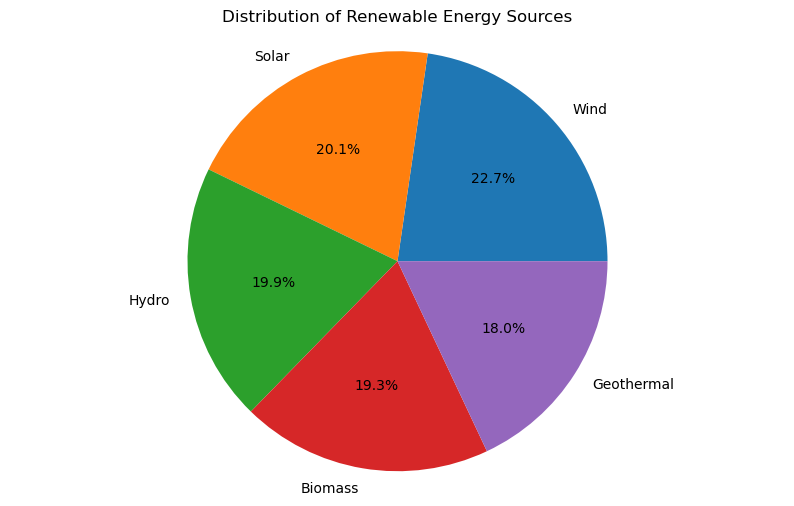

In [5]:
plt.figure(figsize=(10, 6))
energy_counts = df['Energy_Source'].value_counts()
plt.pie(energy_counts.values, labels=energy_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Renewable Energy Sources')
plt.axis('equal')
plt.show()

### Monthly Usage

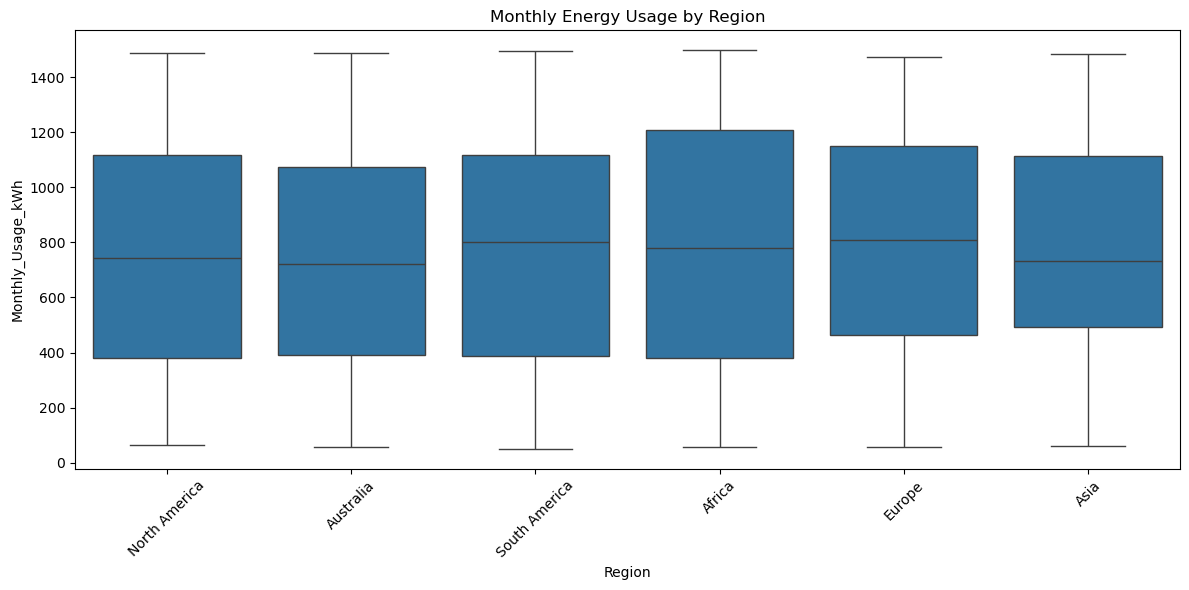

In [6]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Monthly_Usage_kWh', data=df)
plt.title('Monthly Energy Usage by Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Relationship between Household Size and Monthly Usage

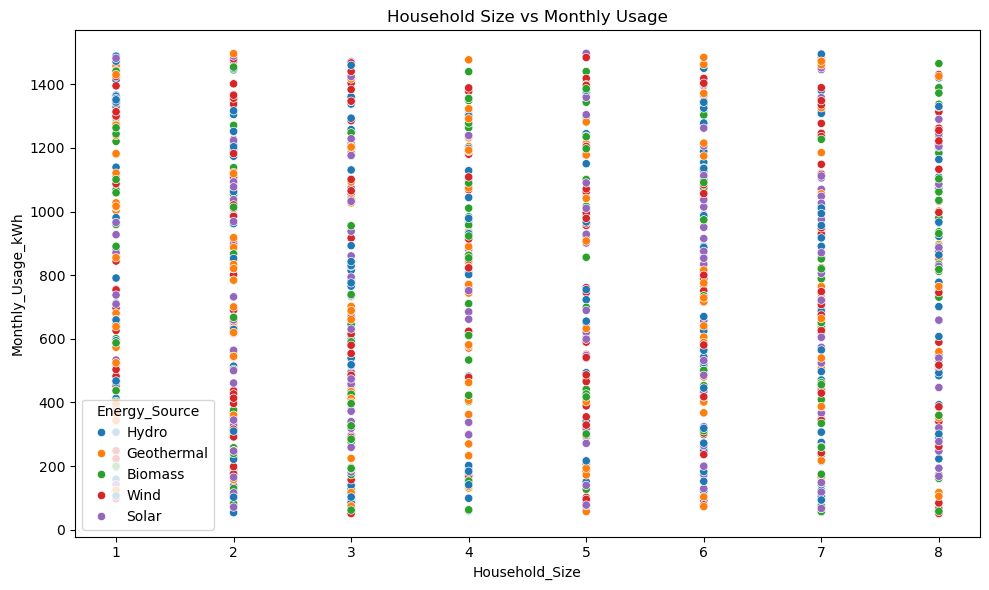

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Household_Size', y='Monthly_Usage_kWh', hue='Energy_Source')
plt.title('Household Size vs Monthly Usage')
plt.tight_layout()
plt.show()

### Usage Distribution

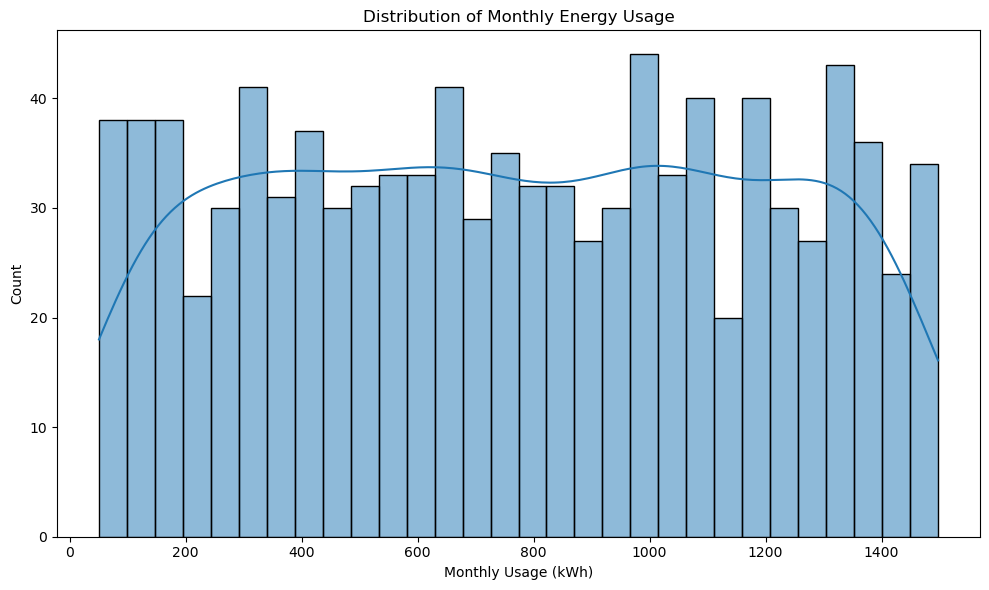

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Monthly_Usage_kWh', bins=30, kde=True)
plt.title('Distribution of Monthly Energy Usage')
plt.xlabel('Monthly Usage (kWh)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### Energy Usage by Urban/Rural Areas and Income Level

In [9]:
fig1 = px.box(df, 
              x='Urban_Rural', 
              y='Monthly_Usage_kWh',
              color='Income_Level',
              title='Energy Usage by Location and Income Level',
              labels={'Monthly_Usage_kWh': 'Monthly Usage (kWh)',
                     'Urban_Rural': 'Location Type',
                     'Income_Level': 'Income Level'})
fig1.show()

### Cost Savings Analysis

In [10]:
fig2 = px.scatter(df, 
                 x='Monthly_Usage_kWh', 
                 y='Cost_Savings_USD',
                 color='Energy_Source',
                 size='Household_Size',
                 hover_data=['Region', 'Income_Level'],
                 title='Cost Savings vs Monthly Usage by Energy Source')
fig2.show()


### Adoption Trends Over Time

In [11]:
yearly_adoption = df.groupby(['Adoption_Year', 'Energy_Source']).size().reset_index(name='count')
fig3 = px.line(yearly_adoption, 
               x='Adoption_Year', 
               y='count',
               color='Energy_Source',
               title='Renewable Energy Adoption Trends Over Time')
fig3.show()

### Regional Energy Source Distribution

In [12]:
region_energy = pd.crosstab(df['Region'], df['Energy_Source'])
fig4 = px.bar(region_energy, 
              title='Energy Source Distribution by Region',
              barmode='stack')
fig4.show()

### Subsidy Impact Analysis

In [13]:
fig5 = px.violin(df, 
                 x='Subsidy_Received', 
                 y='Cost_Savings_USD',
                 color='Income_Level',
                 box=True,
                 title='Impact of Subsidies on Cost Savings by Income Level')
fig5.show()

### Energy Efficiency Score (Monthly Usage per Person)

In [14]:
df['Usage_Per_Person'] = df['Monthly_Usage_kWh'] / df['Household_Size']

# Efficiency Analysis by Region and Income
fig6 = px.box(df, 
              x='Region', 
              y='Usage_Per_Person',
              color='Income_Level',
              title='Energy Efficiency (Usage per Person) by Region and Income Level')
fig6.show()

### Cost-Benefit Analysis

In [15]:
df['ROI'] = (df['Cost_Savings_USD'] / df['Monthly_Usage_kWh']).round(3)

fig7 = px.scatter(df, 
                 x='ROI', 
                 y='Monthly_Usage_kWh',
                 color='Energy_Source',
                 facet_col='Urban_Rural',
                 title='Return on Investment Analysis by Location Type')
fig7.show()

### Age of Installation Analysis

In [16]:
df['Installation_Age'] = 2024 - df['Adoption_Year']

fig8 = px.scatter(df, 
                 x='Installation_Age', 
                 y='Cost_Savings_USD',
                 color='Energy_Source',
                 
                 title='Impact of Installation Age on Cost Savings')
fig8.show()

### Income Level Distribution by Energy Source

In [17]:
fig9 = px.sunburst(df, 
                   path=['Region', 'Income_Level', 'Energy_Source'],
                   title='Hierarchical View of Energy Adoption Patterns')
fig9.show()

### Monthly Usage Patterns

In [18]:
# Creating usage categories
df['Usage_Category'] = pd.qcut(df['Monthly_Usage_kWh'], 
                             q=4, 
                             labels=['Low', 'Medium', 'High', 'Very High'])

fig10 = px.treemap(df, 
                  path=[px.Constant("all"), 'Usage_Category', 'Energy_Source', 'Income_Level'],
                  title='Usage Patterns Breakdown')
fig10.show()

### Subsidy Impact on Different Demographics

In [19]:
subsidy_impact = pd.pivot_table(df, 
                              values='Cost_Savings_USD',
                              index=['Income_Level', 'Urban_Rural'],
                              columns='Subsidy_Received',
                              aggfunc='mean').round(2)

fig11 = go.Figure(data=[
    go.Heatmap(
        z=subsidy_impact.values,
        x=['No Subsidy', 'With Subsidy'],
        y=[f"{idx[0]} - {idx[1]}" for idx in subsidy_impact.index],
        colorscale='RdYlGn'
    )
])
fig11.update_layout(title='Average Cost Savings: Subsidy Impact Analysis')
fig11.show()

### Additional Key Insights

In [20]:
print("\nKey Statistical Insights:")
print("-" * 50)
print(f"Average Usage per Person: {df['Usage_Per_Person'].mean():.2f} kWh")
print(f"Most Efficient Region: {df.groupby('Region')['Usage_Per_Person'].mean().idxmin()}")
print(f"Most Cost-Effective Energy Source: {df.groupby('Energy_Source')['ROI'].mean().idxmax()}")
print(f"Subsidy Impact: {(df[df['Subsidy_Received']=='Yes']['Cost_Savings_USD'].mean() - df[df['Subsidy_Received']=='No']['Cost_Savings_USD'].mean()):.2f} USD average increase")


Key Statistical Insights:
--------------------------------------------------
Average Usage per Person: 268.01 kWh
Most Efficient Region: Australia
Most Cost-Effective Energy Source: Wind
Subsidy Impact: -6.18 USD average increase


## Predictive Models ##

In [21]:
columns_to_drop = ['Household_ID', 'Monthly_Usage_kWh', 'Usage_Per_Person', 'ROI', 'Usage_Category']
X = df.drop(columns=columns_to_drop)
y = df['Monthly_Usage_kWh']

categorical_columns = X.select_dtypes(include=['object', 'category']).columns

In [22]:
# label encoders for each categorical column
encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    encoders[column] = le

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
# Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [26]:
# predictions
y_pred = rf_model.predict(X_test_scaled)

In [27]:
# model performance
print("\nModel Performance Metrics:")
print("-"*50)
print(f"R2 Score: {r2_score(y_test, y_pred):.4f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")


Model Performance Metrics:
--------------------------------------------------
R2 Score: -0.0459
Mean Absolute Error: 372.6653
Root Mean Squared Error: 438.3234


In [28]:
# Cross-validation
cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='r2')
print(f"\nCross-validation R2 scores: {cv_scores}")
print(f"Average CV R2 score: {cv_scores.mean():.4f}")


Cross-validation R2 scores: [-0.04108018 -0.07415565 -0.00431758 -0.12408522 -0.14132015]
Average CV R2 score: -0.0770


In [29]:
# Feature importance plot
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

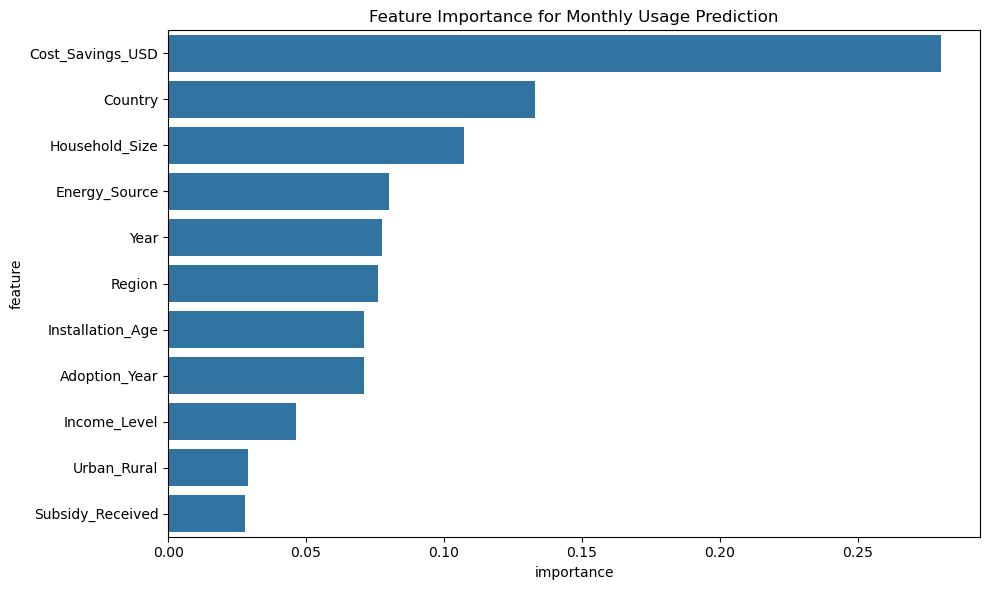

In [30]:
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance for Monthly Usage Prediction')
plt.tight_layout()
plt.show()

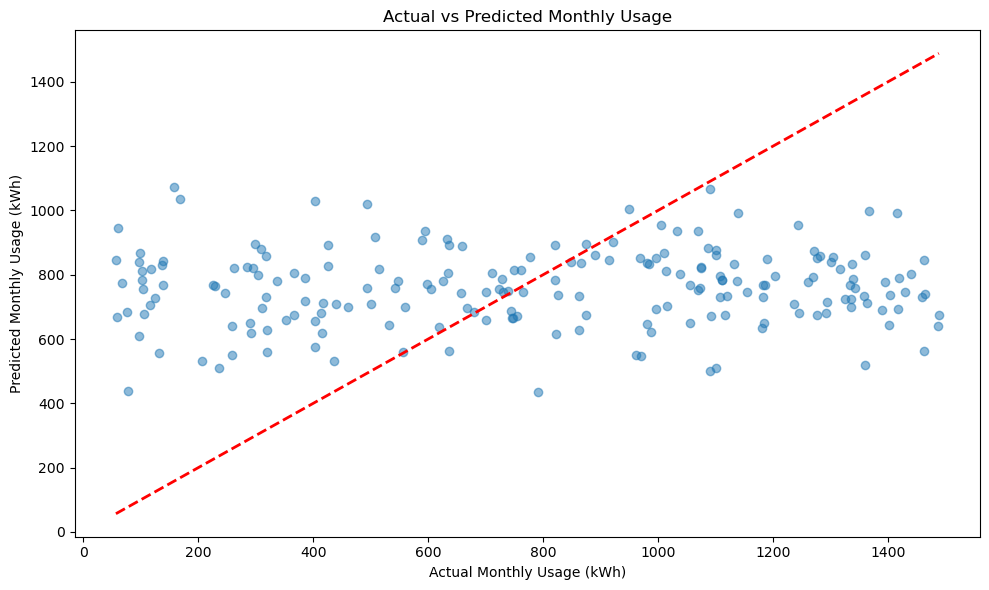

In [31]:
# Actual vs Predicted plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Monthly Usage (kWh)')
plt.ylabel('Predicted Monthly Usage (kWh)')
plt.title('Actual vs Predicted Monthly Usage')
plt.tight_layout()
plt.show()

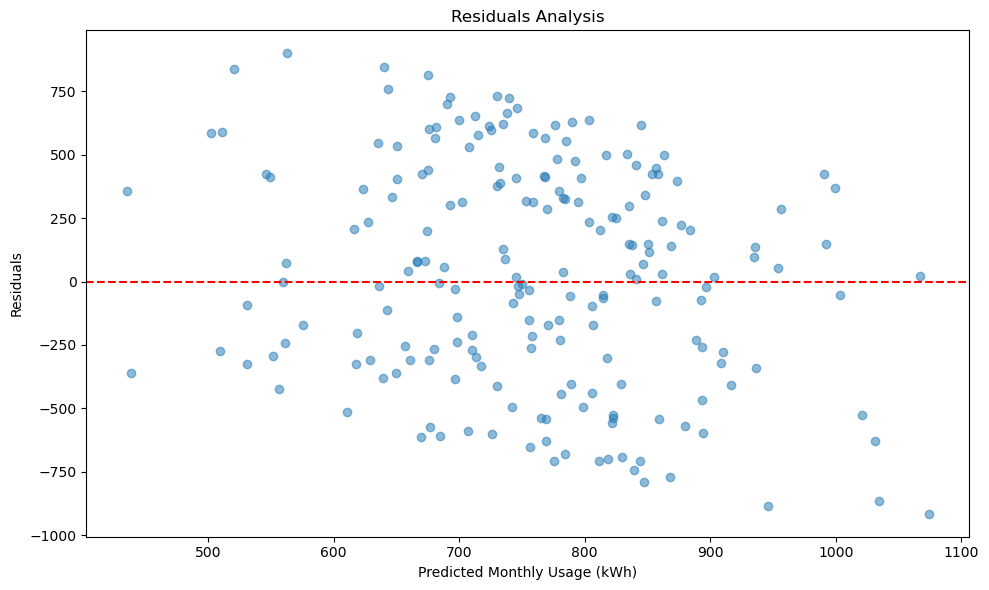

In [32]:
# residuals analysis
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Monthly Usage (kWh)')
plt.ylabel('Residuals')
plt.title('Residuals Analysis')
plt.tight_layout()
plt.show()

**Random Forest Model is not a good fit**

### XGBOOST REGRESSOR ###

In [33]:
# Feature Engineering
def create_features(df):
    df = df.copy()
    
    # interaction features
    df['Usage_Efficiency'] = df['Cost_Savings_USD'] / df['Monthly_Usage_kWh']
    df['Years_Since_Adoption'] = df['Year'] - df['Adoption_Year']
    df['Household_Income_Impact'] = df['Household_Size'] * (df['Income_Level'].map({'Low': 1, 'Middle': 2, 'High': 3}))
    
    return df

In [34]:
columns_to_drop = ['Household_ID', 'Monthly_Usage_kWh', 'Usage_Per_Person', 'ROI', 'Usage_Category']
df_processed = create_features(df)
X = df_processed.drop(columns=columns_to_drop)
y = df_processed['Monthly_Usage_kWh']

In [35]:
categorical_columns = X.select_dtypes(include=['object', 'category']).columns
encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    encoders[column] = le

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [38]:
# parameter grid
param_grid = {
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0]
}

In [39]:
# XGBoost model
xgb = XGBRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    verbose=1,
    n_jobs=-1
)

In [40]:
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 6],
                         'n_estimators': [100, 200], 'subsample': [0.8, 1.0]},
             scoring='r2', verbose=1)

In [41]:
# best parameters and score
print("\nBest Parameters:")
print(grid_search.best_params_)
print(f"\nBest Cross-Validation Score: {grid_search.best_score_:.4f}")


Best Parameters:
{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.8}

Best Cross-Validation Score: 0.9767


In [42]:
# best model
best_model = grid_search.best_estimator_

# predictions
y_pred = best_model.predict(X_test_scaled)

In [43]:
# model performance
print("\nModel Performance Metrics:")
print("-"*50)
print(f"R2 Score: {r2_score(y_test, y_pred):.4f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")


Model Performance Metrics:
--------------------------------------------------
R2 Score: 0.9831
Mean Absolute Error: 33.5992
Root Mean Squared Error: 55.6793


In [44]:
# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': best_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

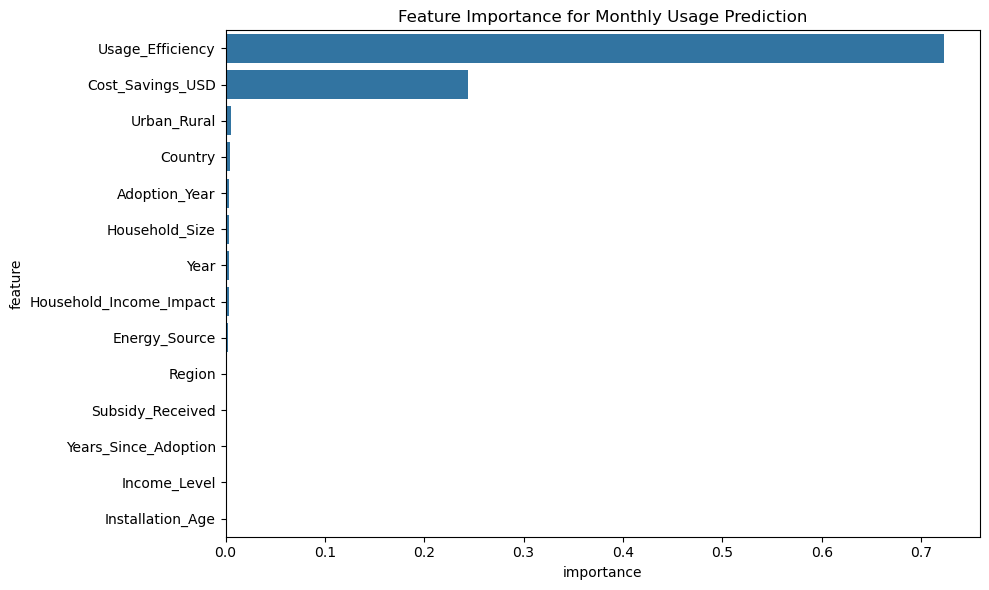

In [45]:
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance for Monthly Usage Prediction')
plt.tight_layout()
plt.show()

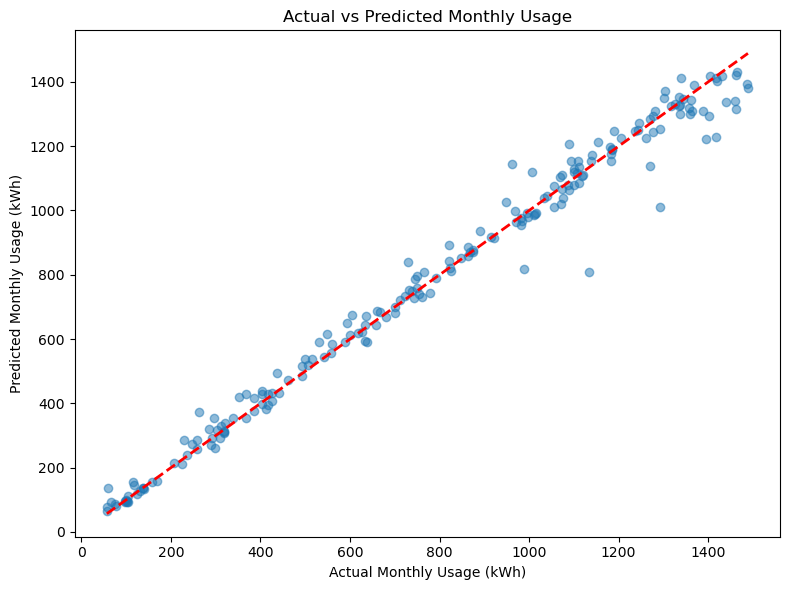

In [46]:
# Actual vs Predicted plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Monthly Usage (kWh)')
plt.ylabel('Predicted Monthly Usage (kWh)')
plt.title('Actual vs Predicted Monthly Usage')
plt.tight_layout()
plt.show()

**That is a much better fit**

---